In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as mplot 
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
 
import random
 

from sklearn.preprocessing import StandardScaler


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model


import pickle 


import shap
import lime
from lime import lime_tabular
import random

import dalex as dx 

from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

from tabulate import tabulate 

import tensorflow as tf
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from tensorflow.keras.utils import plot_model

# Define custom metrics
recall = Recall()
precision = Precision()
f1_score = F1Score()
auc = AUC()






In [2]:
dataSetIndex = 6
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))



finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ]  

X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))

dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_with_AttentionLayers_loaded_Exp3_" + dataSetName)
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += "_{}".format(fileData.shape)


print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
# Oversample the minority class using SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)
#X_test, y_test = rus.fit_resample(X_test, y_test)
X_test, y_test = smote.fit_resample(X_test, y_test) 

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))   
positiveClass =  0
negativeClass = 0
for i in y_train:
    if(i == 0): negativeClass += 1
    if(i == 1): positiveClass += 1
print("Train DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Train DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Train DataSet Total Records:: {}".format(positiveClass + negativeClass)) 
print("\n\n") 
positiveClass =  0
negativeClass = 0
for i in y_test:
    if(i == 0): negativeClass += 1
    if(i == 1): positiveClass += 1
print("Test DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Test DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Test DataSet Total Records:: {}".format(positiveClass + negativeClass)) 

X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test) 
# Our vectorized labels
X_train_f32 = np.asarray(X_train).astype(np.float32)  #.astype('float32').reshape((-1,1))
X_test_f32 = np.asarray(X_test).astype(np.float32)
#y_train_scaler = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_scaler = np.asarray(y_test).astype('float32').reshape((-1,1))
# Separate features and target variable
features = X_train_scaler # data.iloc[:, :-1]
target = np.asarray(y_train).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
print("X_train shape: {}   and dType: {}".format(X_train.shape, len(X_train.columns)))
print("X_train_scaler shape: {}   and dType: {}".format(X_train_scaler.shape, X_train_scaler.dtype))
print("X_test_scaler shape: {}   and dType: {}".format(X_test_scaler.shape, X_test_scaler.dtype)) 
print("y_train shape: {}   and dType: {}".format(y_train.shape, y_train.dtype))  
print("y_test_scaler shape: {}   and dType: {}".format(y_test_scaler.shape, y_test_scaler.dtype))  
print("features shape: {}   and dType: {}".format(features.shape, features.dtype))
print("target shape: {}   and dType: {}".format(target.shape, target.dtype)) 


print("\n\n\n ------------------------------------------------------------")
print(" Directory Path: {} ".format(dataSetResultDirectory))
print(" ------------------------------------------------------------")


Shape of fileData: (37079, 40)
Column Headings: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte',
       'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Segmented-Neutrophils', 'Hematocrit', 'Albumin',
       'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'Iron',
       'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke',
       'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079

Number of Missing Values: 0
Number of duplicate records removed: 0
Shape of fileData: (37079, 40)
Shape of fileData End: (37079, 40)


columns of x:: 39 

 and features of X: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-I

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



 X Train: Shape:: (56914, 39)
 X Test: Shape:: (14228, 39)
Train DataSet Positive Class Records:: 28457
Train DataSet Negative Class Records:: 28457
Train DataSet Total Records:: 56914



Test DataSet Positive Class Records:: 7114
Test DataSet Negative Class Records:: 7114
Test DataSet Total Records:: 14228
X_train shape: (56914, 39)   and dType: 39
X_train_scaler shape: (56914, 39)   and dType: float64
X_test_scaler shape: (14228, 39)   and dType: float64
y_train shape: (56914,)   and dType: int64
y_test_scaler shape: (14228, 1)   and dType: float32
features shape: (56914, 39)   and dType: float64
target shape: (56914, 1)   and dType: float64



 ------------------------------------------------------------
 Directory Path: ./DatasetResults_MLP_with_AttentionLayers_loaded_Exp3_CardiacPrediction/ 
 ------------------------------------------------------------


In [3]:
from pathlib import Path

modelPath = Path("./DatasetResults_MLP_with_AttentionLayers_XAI_Experiment_3_CardiacPrediction/model02_trained_CardiacPrediction_(37079, 40)_20240110 1017_0.9354090690612793percent.model")
shapExplainerPath = Path("./DatasetResults_MLP_with_AttentionLayers_XAI_Experiment_3_CardiacPrediction/ShapeExplainer_20240110_1017_93.54percent.pkl")
shapValuesPath = Path("./DatasetResults_MLP_with_AttentionLayers_XAI_Experiment_3_CardiacPrediction/ShapeExplainerValues_20240110_1017_93.54percent.pkl")



modelPath = Path("./DatasetResults_MLP_with_AttentionLayers_Low_Dimensions _XAI_CardiacPrediction/model02_trained_CardiacPrediction_(37079, 40)_20240110 0942_0.9564239382743835percent.model")
shapExplainerPath = Path("./DatasetResults_MLP_with_AttentionLayers_Low_Dimensions _XAI_CardiacPrediction/ShapeExplainer_20240110_0943_95.64percent.pkl")
shapValuesPath = Path("./DatasetResults_MLP_with_AttentionLayers_Low_Dimensions _XAI_CardiacPrediction/ShapeExplainerValues_20240110_0943_95.64percent.pkl")




import pickle

if modelPath.exists(): print(f"Yes! The file path MLP Model exists.")
else: print(f"The file path MLP Model does not exist.")


loadedModel = 0
loadedExplainer = 0
loadedShapValues = 0

 
# To load the saved explainer and SHAP values later:
loaded_model = tf.keras.models.load_model(modelPath)


Yes! The file path MLP Model exists.



In [6]:
import time

batchSize  = 1
single_instance = np.random.rand(batchSize, features.shape[1])
single_instance = np.asarray(single_instance)
start_time = time.time()
predictions = loaded_model.predict(single_instance)  # Expand dimensions if needed
end_time = time.time()
prediction_time_single = end_time - start_time
prediction_time_single_ms = prediction_time_single * 1000
print(f"Prediction Time for {single_instance.shape[0]} (miliSec): ", prediction_time_single_ms)


batchSize  = 500
single_instance = np.random.rand(batchSize, features.shape[1])
single_instance = np.asarray(single_instance)
start_time = time.time()
predictions = loaded_model.predict(single_instance)  # Expand dimensions if needed
end_time = time.time()
prediction_time_single = end_time - start_time
prediction_time_single_ms = prediction_time_single * 1000
print(f"Prediction Time for {single_instance.shape[0]} (miliSec): ", prediction_time_single_ms)



1/1 [==============================] - 0s 34ms/step
Prediction Time for 1 (miliSec):  116.7750358581543
16/16 [==============================] - 0s 2ms/step
Prediction Time for 500 (miliSec):  144.03486251831055


In [4]:
if shapExplainerPath.exists(): print(f"Yes! The file path SHAP Explainer exists.")
else: print(f"The file path SHAP Explainer does not exist.")
if shapValuesPath.exists(): print(f"Yes! The file path SHAP Values exists.")
else: print(f"The file path SHAP Values does not exist.")



# Register the AttentionLayer class before loading the model
@tf.keras.utils.register_keras_serializable(package="AttentionLayer")
class AttentionLayer(tf.keras.layers.Layer):
    def call(self, inputs, **kwargs):
        q, v = inputs
        attention = tf.keras.layers.Attention()([q, v])
        return attention
     

# To load the saved explainer and SHAP values later:
#with open(("./DatasetResults_MLP_with_AttentionLayers_imBalancedCardiacPrediction/ShapeExplainer_20240109_1946_95.98percent.pkl"), 'rb') as explainer_file:
#     loadedExplainer = pickle.load(explainer_file)

with open(shapValuesPath, 'rb') as shap_values_file:
     loadedShapValues = pickle.load(shap_values_file)

Yes! The file path SHAP Explainer exists.
Yes! The file path SHAP Values exists.


Total Features: 56914 -> Selected for SHAP:: 3983
Total Test: 14228 -> Selected for SHAP:: 995


--------------------------------------------------
--------------------------------------------------
Top SHAP values:
0, 31, Triglycerides, 0.003989591059592671
1, 37, Blood-Rel-Diabetes, 0.0038125706196016117
2, 0, Gender, 0.002893473018093126
3, 38, Blood-Rel-Stroke, 0.0024798214963925357
4, 22, Cholesterol, 0.0020022983928933533
5, 7, Body-Mass-Index, 0.0018908480869930702
6, 36, Diabetes, 0.001635340499583441
7, 4, Diastolic, 0.0015401811135199502
8, 12, Basophils, 0.0013229307542078521
9, 11, Eosinophils, 0.0012722289206771504
10, 6, Height, 0.001220168464522185
11, 18, Albumin, 0.0006716497039179058
12, 27, Phosphorus, 0.0006381827845568479
13, 32, Total-Cholesterol, 0.0006286838300232517
14, 26, LDH, 0.0005927123476356439
15, 5, Weight, 0.0004750604070094149
16, 29, Protein, 0.00039383007310459986
17, 8, White-Blood-Cells, 0.0003467943079083307
18, 20, AST, 0.0003387352353679664
19,

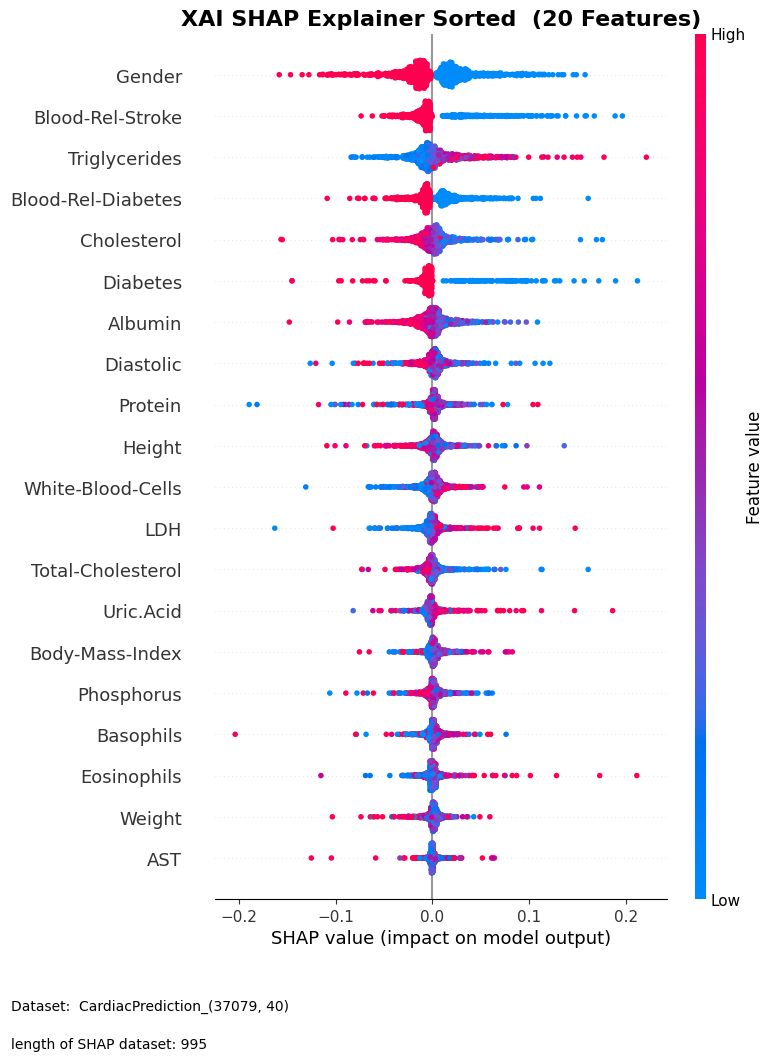

In [38]:
shap_values = loadedShapValues
feature_names = X.columns.tolist()
percentage = 0.07
numberOfFeatures = int(len(features) *percentage)
print("Total Features: {} -> Selected for SHAP:: {}".format(len(features), numberOfFeatures))
featuresForShap = X_train.columns #features[0:numberOfFeatures]
#print(" Features Name: {}".format(  featuresForShap))

numberOftest = int(len(X_test_scaler) * percentage)
print("Total Test: {} -> Selected for SHAP:: {}".format(len(X_test_scaler), numberOftest))
testForShap = X_test_scaler[0:len(featuresForShap)]
testForShap = X_test_scaler[0:numberOftest]
#print(" testForShap Name: {}".format(  testForShap))

avg_shap_values2 = {}
howManyFeatures = 20
# Calculate feature importance based on the mean absolute SHAP values
feature_importance = (shap_values).mean(axis=0)
top_features_indices_Sorted = np.argsort(feature_importance)[::-1] 
top_features_indices = np.argsort(feature_importance)[::-1][:howManyFeatures]
# Select only the top features and corresponding SHAP values
featureNamesSHAP = X.columns[top_features_indices_Sorted]
top_features = testForShap[:, top_features_indices_Sorted]
top_shap_values = shap_values[:, top_features_indices_Sorted] 

print("\n\n--------------------------------------------------")
print("--------------------------------------------------")
print("Top SHAP values:")
for i in range(len(top_features_indices_Sorted)-1):
    feature_index = top_features_indices_Sorted[i]
    feature_name = feature_names[feature_index]
    shap_value = (top_shap_values[:, i]).mean(axis=0) #np.mean(np.abs(shap_values[:, i]))
    avg_shap_values2[i]= (shap_value * 100.0)
    print(f"{i}, {feature_index}, {feature_name}, {shap_value }")
    #print(f"{feature_name}, { shap_value}")
 
top_10_shap_values = shap_values[:, top_features_indices] 
top_10_feature_names = X.columns[top_features_indices]
# Create a DataFrame for visualization

print("\n\n--------------------------------------------------")
#print("DF data Shape: {} and Column Shape: {}".format(top_10_shap_values.shap, top_10_feature_names.shape))
print(f"DF data: {top_10_shap_values} ")
print("\n\n--------------------------------------------------")
print(f"DF Column: {top_10_feature_names} ")


df_top_10 = pd.DataFrame(data=top_10_shap_values, columns=top_10_feature_names)

shap.summary_plot(top_10_shap_values, testForShap[:, top_features_indices], feature_names=top_10_feature_names, show=False)

ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_Explainer_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
#os.startfile(picturePath)
mplot.close()
 

In [39]:
# Plot the summary Bar
shap.summary_plot(top_10_shap_values, testForShap[:, top_features_indices], feature_names=top_10_feature_names, plot_type="bar", show=False)
ax = mplot.gca() 
ax.set_title("XAI SHAP Explainer Sorted  ({} Features)".format(howManyFeatures) ,fontsize=16, fontweight='bold')     
dataSetString = "Dataset:  {}".format(dataSetName)
testingDatasetString ="length of SHAP dataset: {}".format(len(testForShap)) 
ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   

picturePath = "{}XAI_SHAP_Explainer_Bar_{}_Sorted_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
#os.startfile(picturePath)
mplot.close()

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

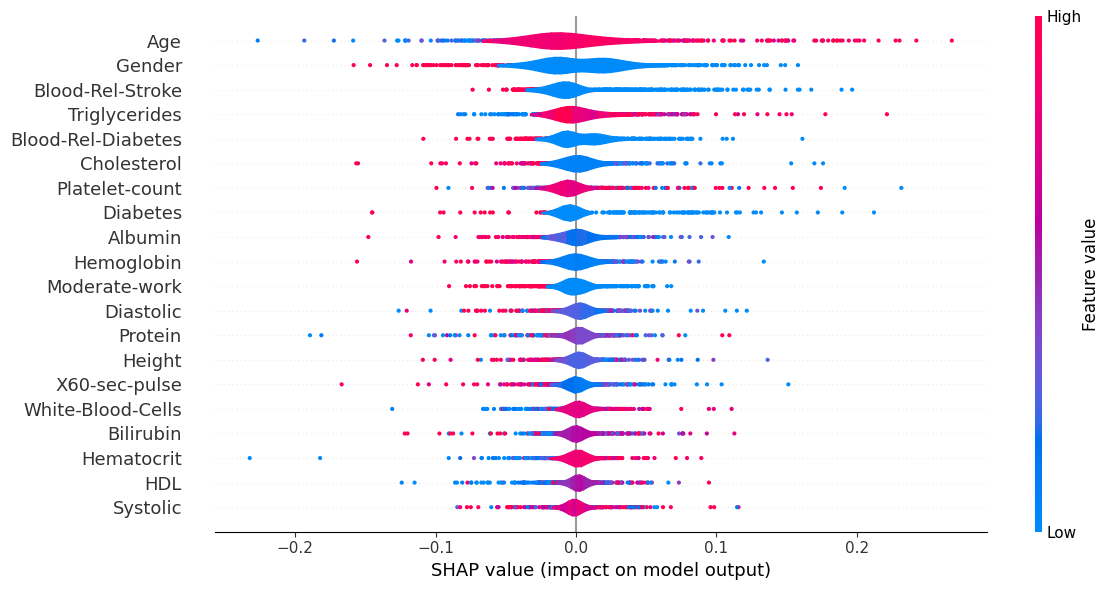

In [40]:
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, plot_type="violin", show=False, plot_size=(12, 6))

picturePath = "{}XAI_SHAP_Explainer_Violin_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
mplot.close()

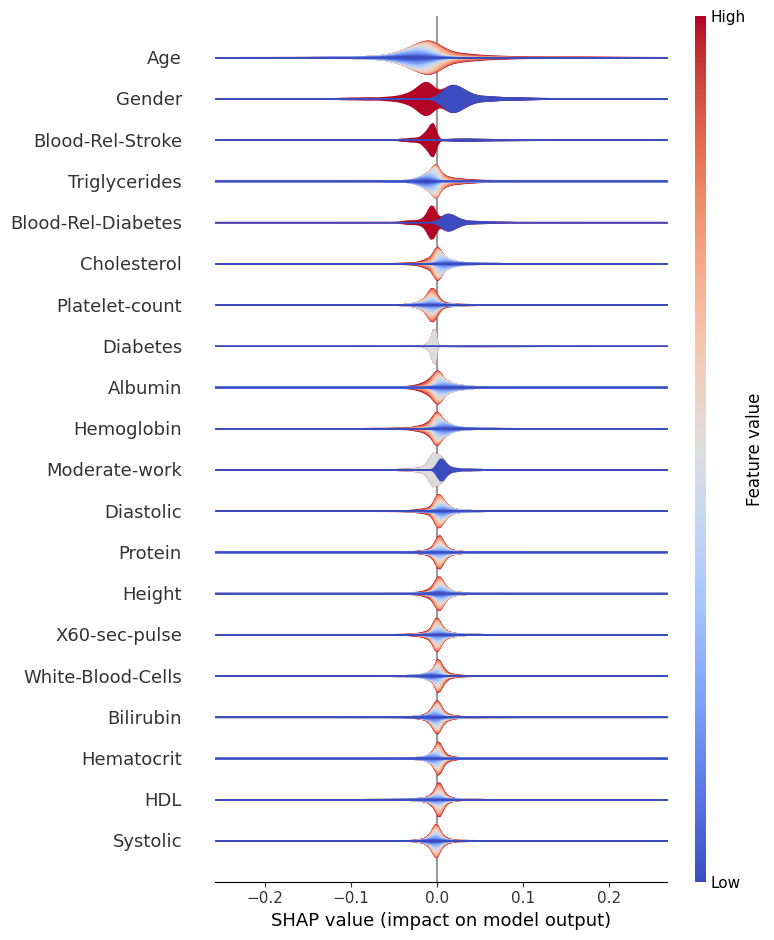

In [41]:
shap.summary_plot(top_shap_values, top_features, feature_names=featureNamesSHAP, plot_type="layered_violin", show=False )

picturePath = "{}XAI_SHAP_Explainer_layered_violin_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
mplot.show()
mplot.close()

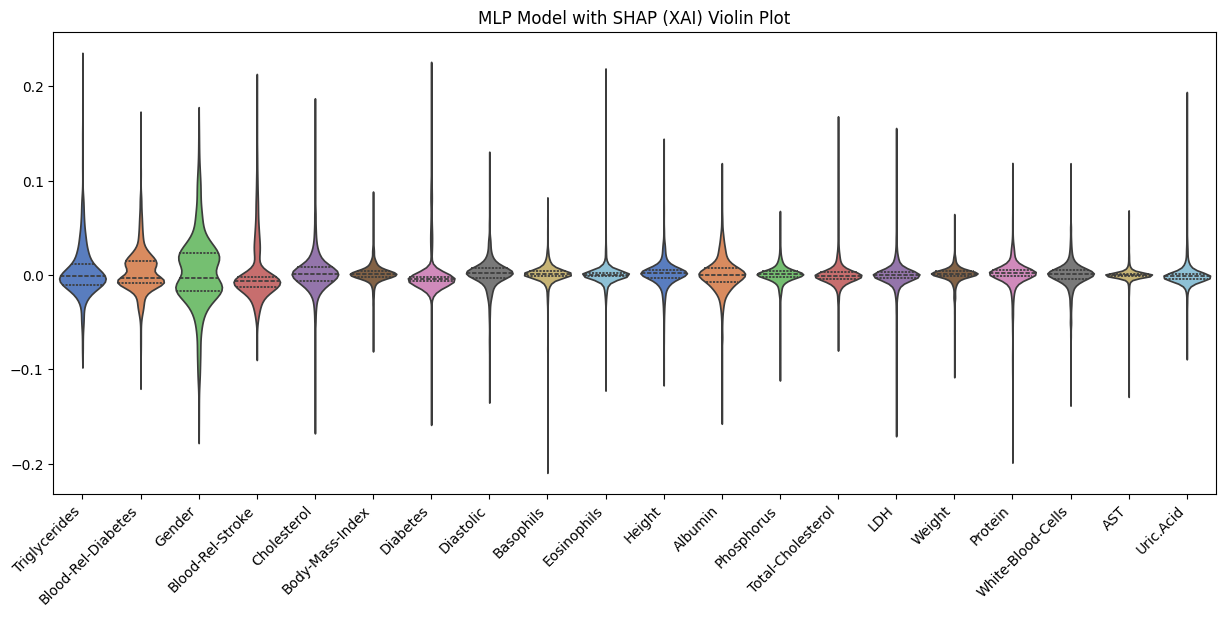

In [43]:
import matplotlib.pyplot as plt

# Plotting with Seaborn's violinplot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_top_10, inner="quartile", palette="muted") 
plt.title('MLP Model with SHAP (XAI) Violin Plot')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Violinplot_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

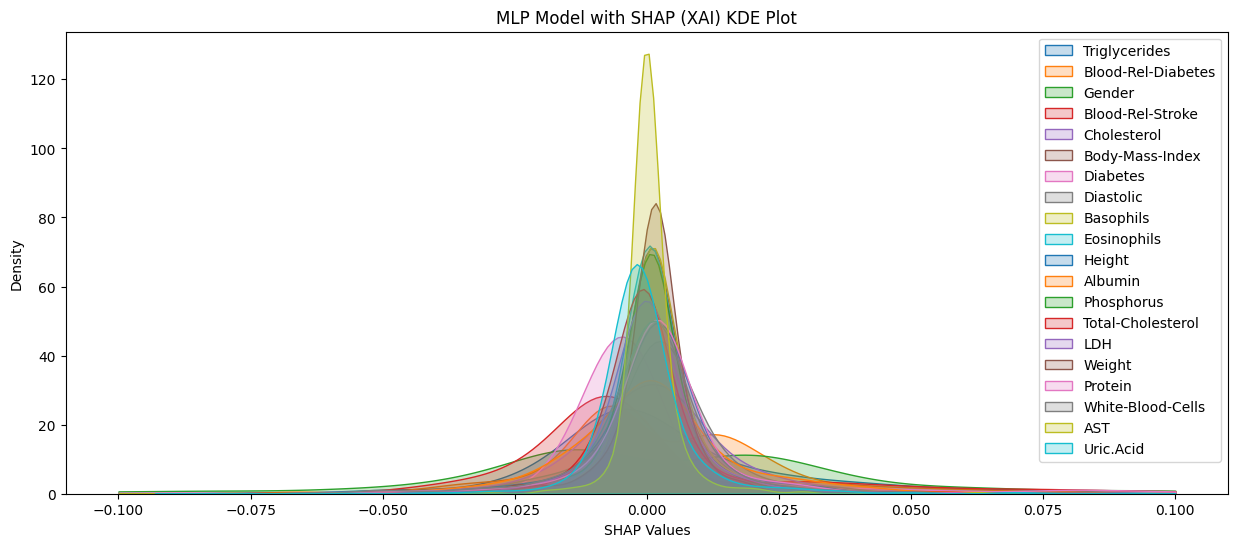

In [45]:
# Set the x-axis range
x_axis_range = (-0.1, 0.1)  # Adjust the range as needed
# Plotting with Seaborn's kdeplot
plt.figure(figsize=(15, 6))
for feature in top_10_feature_names:
    sns.kdeplot(data=df_top_10[feature], label=feature, common_norm=False, common_grid=True, fill=True, clip=x_axis_range)
 
plt.title('MLP Model with SHAP (XAI) KDE Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Density')
plt.legend()
picturePath = "{}XAI_SHAP_Explainer_SNS_KDEplot_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

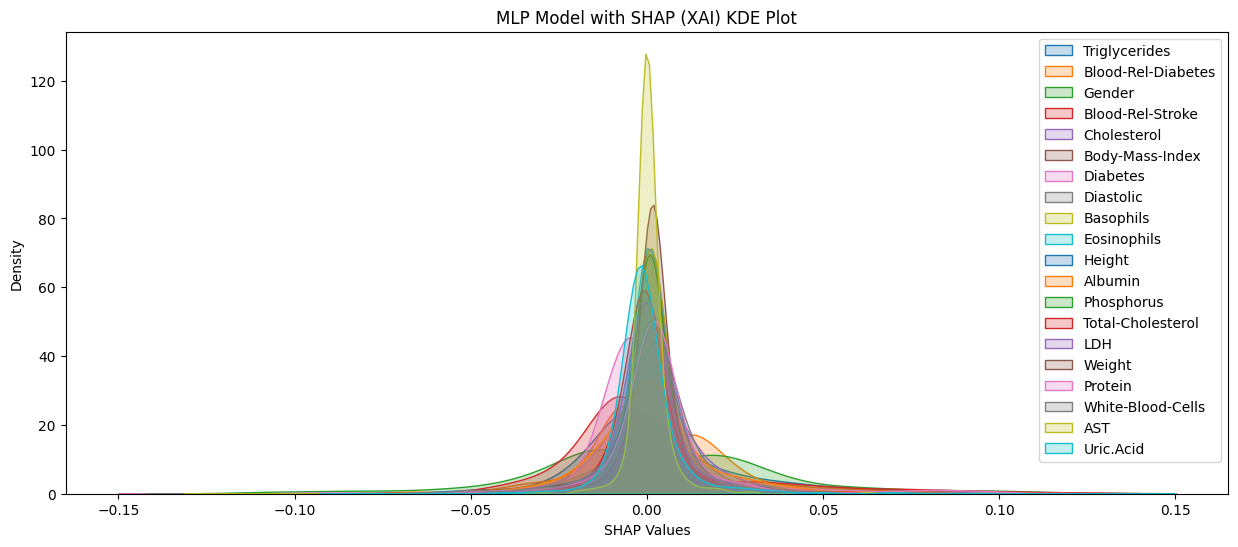

In [46]:
# Set the x-axis range
x_axis_range = (-0.15, 0.15)  # Adjust the range as needed
# Plotting with Seaborn's kdeplot
plt.figure(figsize=(15, 6))
for feature in top_10_feature_names:
    sns.kdeplot(data=df_top_10[feature], label=feature, common_norm=True, common_grid=True, fill=True, clip=x_axis_range)
 
plt.title('MLP Model with SHAP (XAI) KDE Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Density')
plt.legend()
picturePath = "{}XAI_SHAP_Explainer_SNS_KDEplot_2_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

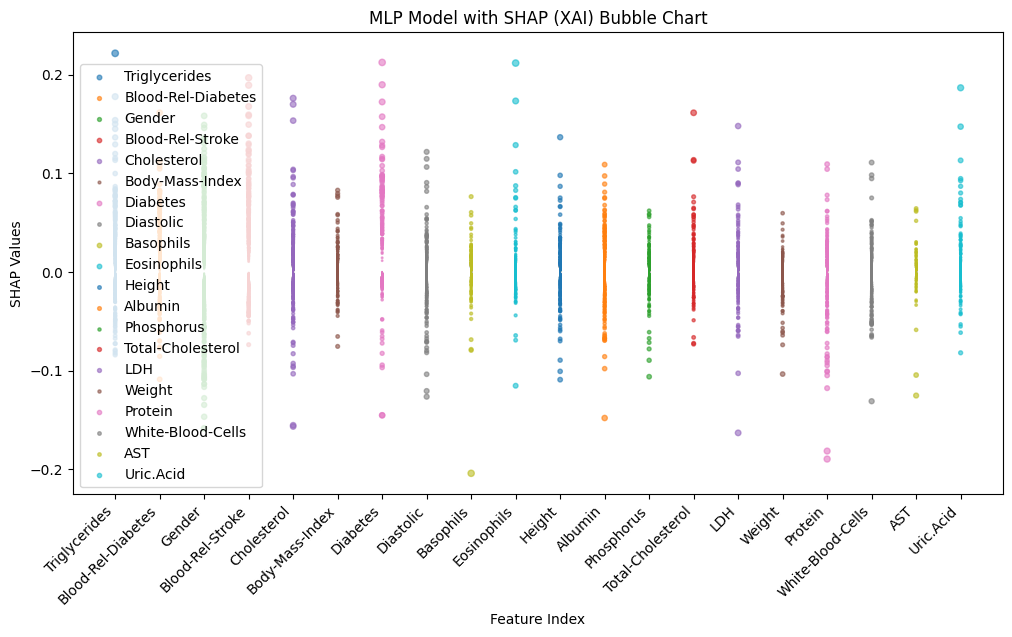

In [47]:
# Plotting a Bubble Chart
plt.figure(figsize=(12, 6))

for i, feature in enumerate(top_10_feature_names):
    size = np.abs(df_top_10[feature]) * 100  # Adjust the scale as needed
    plt.scatter(x=[i] * len(df_top_10), y=df_top_10[feature], s=size, label=feature, alpha=0.6)
 
plt.title('MLP Model with SHAP (XAI) Bubble Chart')
plt.xlabel('Feature Index')
plt.ylabel('SHAP Values')
plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')
plt.legend()

picturePath = "{}XAI_SHAP_Explainer_SNS_BubbleChart_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

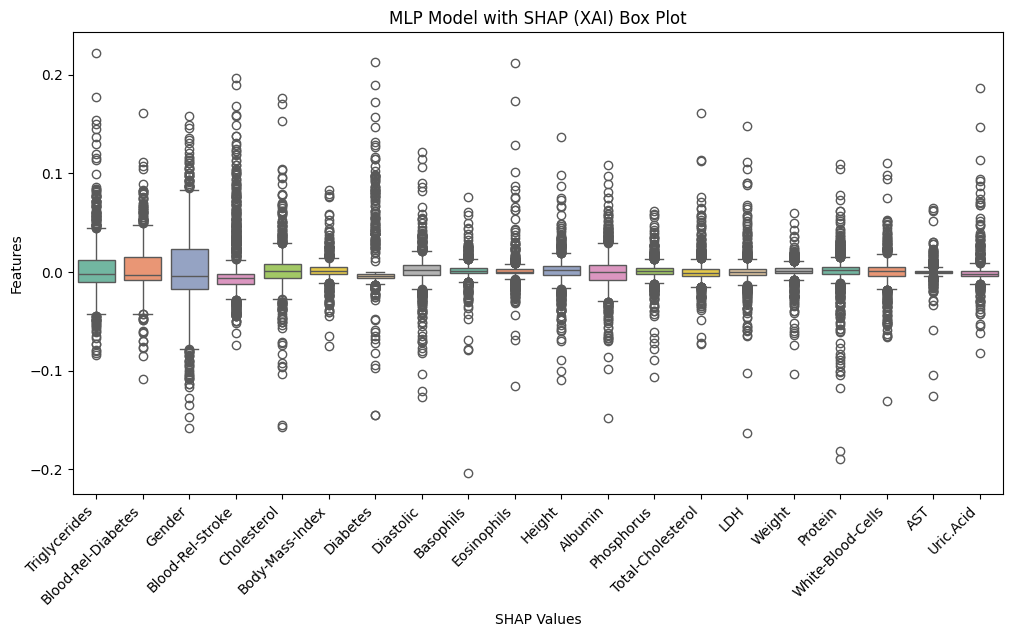

In [48]:
# Plotting a boxplot for the top 10 features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, orient='v', palette='Set2')


plt.title('MLP Model with SHAP (XAI) Box Plot')
plt.xlabel('SHAP Values')
plt.ylabel('Features')
plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_BoxPlot_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

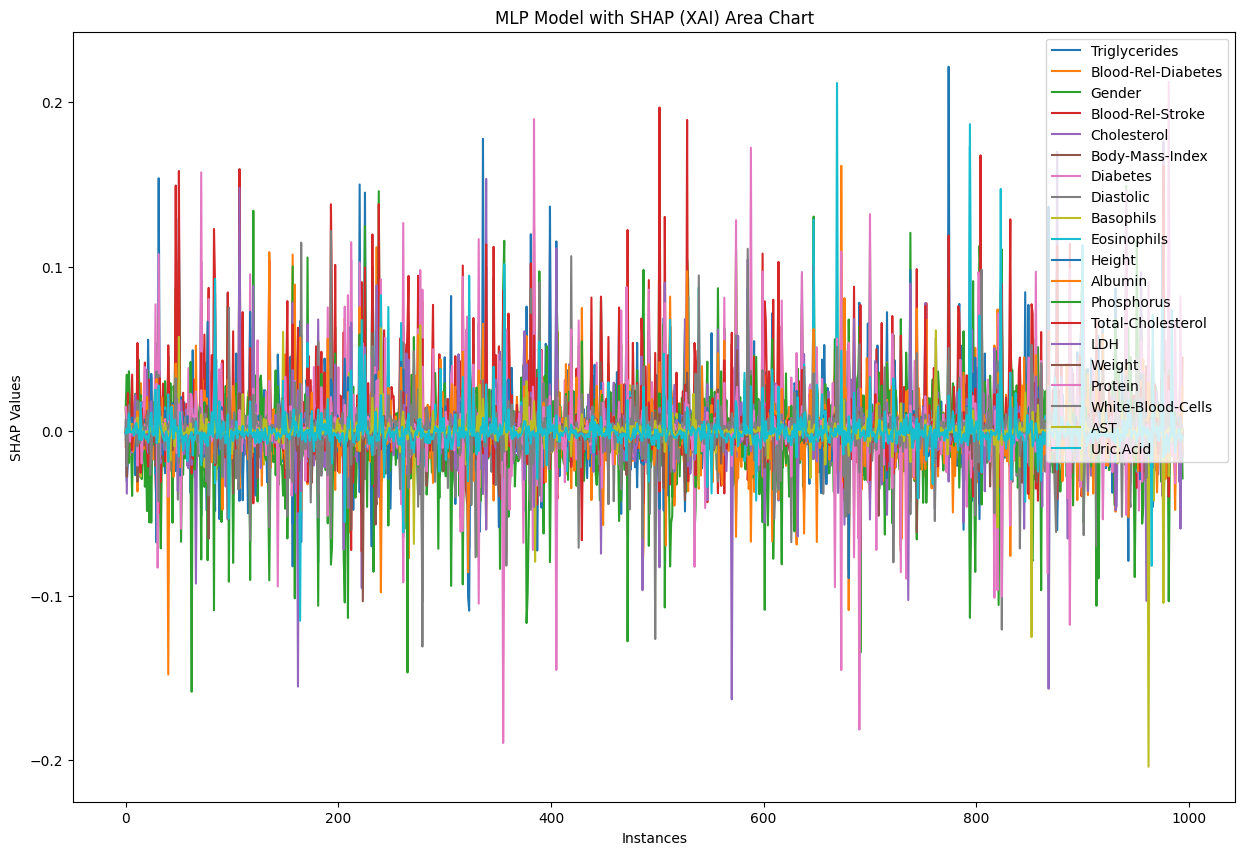

In [49]:
# Plotting an area chart for all SHAP values of the top 10 features
plt.figure(figsize=(15, 10))
for feature in top_10_feature_names:
    sns.lineplot(x=range(df_top_10.shape[0]), y=df_top_10[feature], label=feature)
 
plt.title('MLP Model with SHAP (XAI) Area Chart')

plt.xlabel('Instances')
plt.ylabel('SHAP Values')
plt.legend(loc='upper right')

picturePath = "{}XAI_SHAP_Explainer_SNS_AreaChart_{}_numberOfSamples_{}.png".format(dataSetResultDirectory,  dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

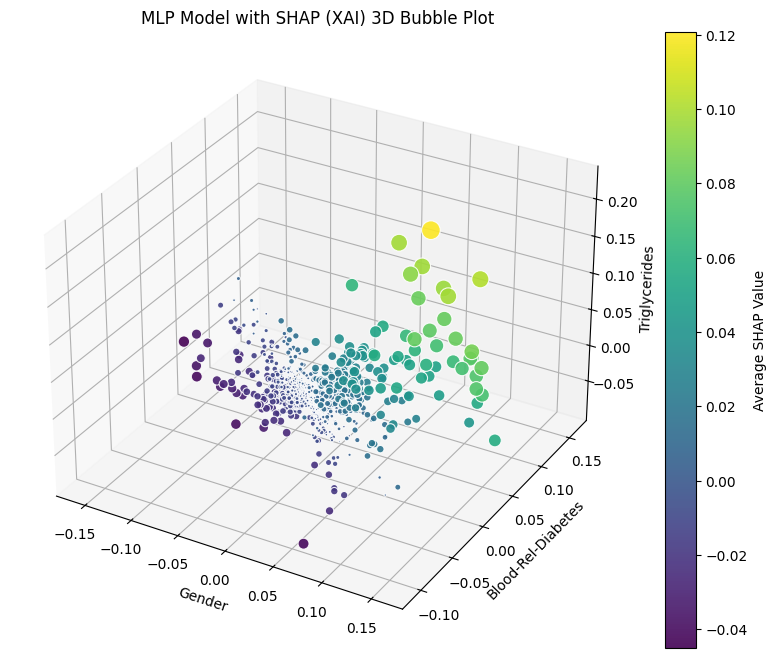

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming your features are in a pandas DataFrame, you can access feature names
feature_names = X.columns.tolist()
# Get the top 3 features based on their absolute average SHAP values
top_3_feature_indices = np.argsort(np.abs(shap_values.mean(0)))[-3:]
top_3_feature_names = [feature_names[i] for i in top_3_feature_indices]
# Extract SHAP values for the top 3 features
shap_values_top_3 = shap_values[:, top_3_feature_indices]
# Create a DataFrame for visualization
df_top_3 = pd.DataFrame(data=shap_values_top_3, columns=top_3_feature_names)

# Create a 3D bubble plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
 

# Scatter plot with adjusted size and color
scatter = ax.scatter(df_top_3[top_3_feature_names[0]], df_top_3[top_3_feature_names[1]], df_top_3[top_3_feature_names[2]],
                     s=1500 * np.abs(df_top_3.mean(axis=1)),  # Adjust the size
                     c=df_top_3.mean(axis=1), cmap='viridis', alpha=0.9, edgecolors='w', linewidth=0.8)  # Adjust the color

# Add labels and title
ax.set_xlabel(top_3_feature_names[0])
ax.set_ylabel(top_3_feature_names[1])
ax.set_zlabel(top_3_feature_names[2])
ax.set_title('3D Bubble Plot of Top 3 Features')
plt.title('MLP Model with SHAP (XAI) 3D Bubble Plot')


# Add colorbar
colorbar = plt.colorbar(scatter, ax=ax, label='Average SHAP Value')

picturePath = "{}XAI_SHAP_Explainer_SNS_BubblePlot_3D_{}_numberOfSamples_{}.png".format(dataSetResultDirectory, dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

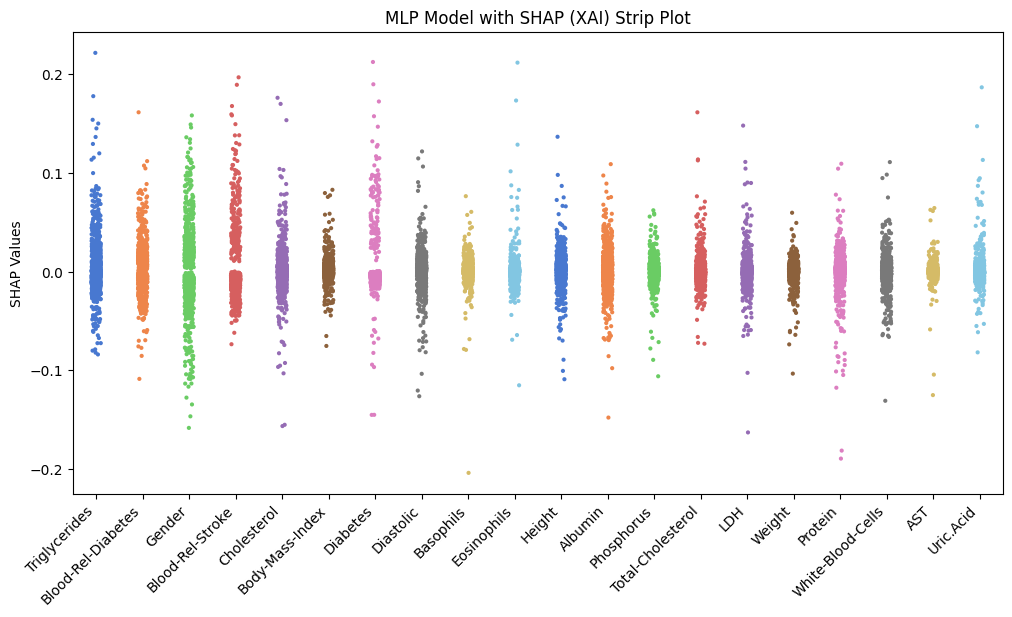

In [51]:
# Plotting with Seaborn's swarmplot (Beeswarm plot) 
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_top_10, palette="muted", size=3, jitter=True)  # Use jitter=True for strip plot

plt.title('MLP Model with SHAP (XAI) Strip Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Stripplot_{}_numberOfSamples_{}.png".format(dataSetResultDirectory,  dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [52]:
# Plotting with Seaborn's swarmplot (Beeswarm plot)
123ssf
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_top_10, palette="muted", size=3) 
plt.title('MLP Model with SHAP (XAI) Beeswarm Plot')
plt.ylabel('SHAP Values')
plt.xticks(rotation=45, ha='right')

picturePath = "{}XAI_SHAP_Explainer_SNS_Beeswarmplot_{}_numberOfSamples_{}.png".format(dataSetResultDirectory,  dataSetName, len(testForShap))
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

SyntaxError: invalid decimal literal (1165389692.py, line 2)